# Softmax Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import sklearn
from sklearn.datasets import make_blobs 
#The make_blobs function is useful for creating simple datasets for testing and prototyping machine learning models without the need for real-world data.

2023-08-02 16:00:40.186848: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 16:00:40.332349: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 16:00:40.333452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 16:00:42.428660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### sklearn.make_blobs 

- **sklearn.make_blobs** is a utility function used to generate synthetic datasets for clustering and classification tasks. The function creates random data points that are normally distributed around specified cluster centers with a defined standard deviation.

* The **make_blobs** function is useful for creating simple datasets for testing and prototyping machine learning models without the need for real-world data.

**Parameters:**

- n_samples: The total number of data points to generate.
- n_features: The number of features (or dimensions) for each data point.
- centers: The number of cluster centers to generate. It can be an integer or an array-like specifying the center coordinates of the clusters.
- cluster_std: The standard deviation of each cluster. Larger values spread the data points more widely around the cluster centers.
- random_state: Seed for the random number generator. Setting a value for random_state ensures reproducibility of the generated data.

**Returns:**

- X: An array of shape (n_samples, n_features) containing the generated data points (feature vectors).
- y: An array of shape (n_samples,) containing the labels corresponding to the cluster membership of each data point (only available if centers is specified).


In [2]:
def softmax_py(z):
    ze = np.exp(z) #Element wise exponential
    sm = ze/np.sum(ze)
    return sm

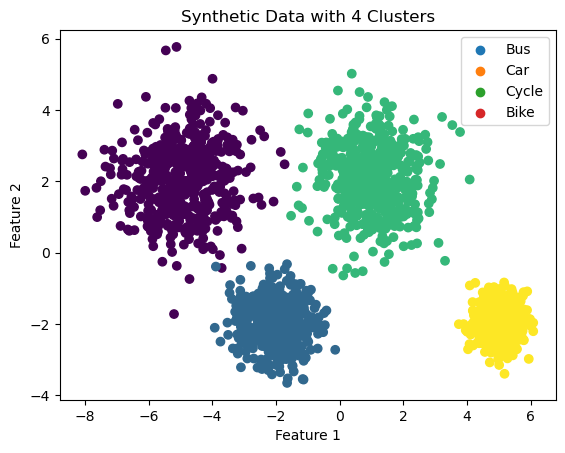

In [3]:
# Generate synthetic data with 4 clusters
centers = [[-5,2],[-2,-2],[1,2],[5,-2]] #Specify center for each cluster
std_dvn = [1,0.6,0.9,0.4] #Specify std deviation for each cluster
X_train, y_train = make_blobs(n_samples = 2000, n_features=2, centers = centers, cluster_std = std_dvn, random_state = 99)

#To specify std deviation for all cluster at once, use the following code
#X_train, y_train = make_blobs(n_samples = 2000, n_features=2, centers = centers, cluster_std = 1.0, random_state = 9)

# Plot the data points with different colors for each cluster
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
cluster_names = ['Bus','Car','Cycle','Bike']
#cmap - 'plasma', 'viridis', 'jet', 'coolwarm', 'cividis'

#To get the names of each class in the plot
for i, name in enumerate(cluster_names):
    plt.scatter([],[],c=f'C{i}', label = name)

#Display the legend
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data with 4 Clusters")
plt.show()

- **cmap** - 'plasma', 'viridis', 'jet', 'coolwarm', 'cividis'
- **c=f'C{i}'**: The c argument specifies the color of the data points. 
- **f'C{i}'** uses an f-string to dynamically set the color based on the index i. 
- The f'C{i}' notation creates a string where the color is set to 'C0' for i=0, 'C1' for i=1, and so on. In matplotlib, 'C0', 'C1', 'C2', etc., represent distinct colors from the default color cycle.

In [4]:
model = Sequential([
    Dense(25, activation = 'relu'),
    Dense(20, activation = 'relu'), 
    Dense(4, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(0.001))

model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
63/63 [==============================] - 1s 3ms/step - loss: 1.1766
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4549
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1806
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0561
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0419
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0339
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0290
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0233


In [5]:
pred_original = model.predict(X_train)
print(pred_original[:2])
print(f"Largest Value: {np.max(pred_original)}\nSmallest Value: {np.min(pred_original)}")

63/63 [==============================] - 0s 2ms/step
[[4.7434864e-04 4.4638896e-04 2.0127017e-02 9.7895229e-01]
 [3.9717820e-03 9.9329227e-01 2.3243795e-03 4.1153267e-04]]
Largest Value: 0.9999881386756897
Smallest Value: 8.707507805072456e-12


## Preffered one
### with logits

In [6]:
model_new = Sequential([
    Dense(25, activation = 'relu'),
    Dense(15, activation = 'relu'),
    Dense(4, activation = 'linear')
])

model_new.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer = tf.keras.optimizers.Adam(0.001))

model_new.fit(X_train,y_train, epochs = 10)

Epoch 1/10
63/63 [==============================] - 2s 3ms/step - loss: 0.8267
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1273
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0213


In [7]:
preferred = model_new.predict(X_train)
print(f"two example output vectors:\n {preferred[:2]}")
print("largest value", np.max(preferred), "smallest value", np.min(preferred))

63/63 [==============================] - 0s 3ms/step
two example output vectors:
 [[-5.6141286 -4.052259  -1.3120351  2.4649959]
 [-3.7075686  1.6542861 -6.357435  -3.449218 ]]
largest value 12.170949 smallest value -12.498956


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 

In [8]:
smax_preferred = tf.nn.softmax(preferred).numpy()
print(f"Two examples output vectors:\n{smax_preferred[:2]}")
print("largest value", np.max(smax_preferred),"\nsmallest value", np.min(smax_preferred))

Two examples output vectors:
[[3.0247768e-04 1.4421310e-03 2.2339262e-02 9.7591615e-01]
 [4.6406887e-03 9.8902279e-01 3.2791391e-04 6.0087289e-03]]
largest value 0.99999744 
smallest value 3.8034784e-11


**nn**: Short for neural networks. It's a sub-module within TensorFlow that contains various functions and operations related to neural networks.


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [21]:
cluster_names = ['Bus',"Car","Cycle","Train"]
print(cluster_names)
for i in range(15):
    pref_index = np.argmax(preferred[i])
    cluster_name = cluster_names[pref_index] 
    print(f"{preferred[i]}, category: {cluster_name}")

['Bus', 'Car', 'Cycle', 'Train']
[-5.6141286 -4.052259  -1.3120351  2.4649959], category: Train
[-3.7075686  1.6542861 -6.357435  -3.449218 ], category: Car
[-7.028432  -4.6865964 -3.9341419  3.314064 ], category: Train
[-3.9013495  1.805629  -7.2124343 -4.4195123], category: Car
[-7.042984  -4.6484957 -4.069543   3.2838914], category: Train
[-6.0496664 -4.2049847 -2.5775716  2.8958428], category: Train
[-3.0299375 -2.1842847  6.320201  -1.4318182], category: Cycle
[-3.348354   1.5327154 -5.98269   -3.6542187], category: Car
[-1.6391289 -1.1880245  3.8568115 -1.0809243], category: Cycle
[ 0.65829235 -2.5581503   7.7049212  -4.1848407 ], category: Cycle
[ 8.0380535 -2.3118546  0.3105416 -8.077567 ], category: Bus
[-6.714507  -4.37371   -3.911445   3.0727158], category: Train
[-6.5384965 -4.850382  -1.7206197  3.0840366], category: Train
[-6.340889  -4.419201  -2.8274424  3.092019 ], category: Train
[ 4.507533  -0.4471316 -3.0576646 -7.1736293], category: Bus


In [22]:
for i  in range(12):
    pref_index = np.argmax(preferred[i])
    cluster_name = cluster_names[pref_index] 
    print(f"{smax_preferred[i]}, category: {np.argmax(smax_preferred[i])}")

[3.0247768e-04 1.4421310e-03 2.2339262e-02 9.7591615e-01], category: 3
[4.6406887e-03 9.8902279e-01 3.2791391e-04 6.0087289e-03], category: 1
[3.219903e-05 3.348800e-04 7.106827e-04 9.989222e-01], category: 3
[3.3047744e-03 9.9460632e-01 1.2054689e-04 1.9683694e-03], category: 1
[3.2707467e-05 3.5855846e-04 6.3972891e-04 9.9896902e-01], category: 3
[1.2965321e-04 8.2019734e-04 4.1753678e-03 9.9487478e-01], category: 3
[8.6890861e-05 2.0241202e-04 9.9928111e-01 4.2956477e-04], category: 2
[7.4861622e-03 9.8646313e-01 5.3725671e-04 5.5134576e-03], category: 1
[0.00403196 0.00633036 0.9825916  0.00704599], category: 2
[8.6954486e-04 3.4866545e-05 9.9908870e-01 6.8540307e-06], category: 2
[9.99527574e-01 3.19806240e-05 4.40330768e-04 1.00200545e-07], category: 0
[5.6076835e-05 5.8261101e-04 9.2499214e-04 9.9843627e-01], category: 3


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].